# Imports

In [1]:
import pkg_resources

/var/folders/67/h3lnn6nn2wj20jvk2xsx5tnm0000gn/T/ipykernel_34926/1894539248.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
import numpy as np
import os, sys

In [3]:
sys.path.append(os.path.abspath("/Users/eirinichrysovergi/strw-amuse-project"))

In [4]:
from src.strw_amuse.run_simulation import run_6_body_simulation
from src.strw_amuse.gif_plotting import visualize_frames
from src.strw_amuse.gif_plotting import visualize_initial_final_frames

# Examples of 6 body evolution (3 binaries)

## No encounter

In [5]:
# %%
# No encounter (ref case)
# set initial config for test param
sep= [30, 20, 10] #AU
ecc = [0.0, 0.0, 0]
v_mag = [2, 1]
impact_parameter = [0.0, 10.0] # AU


theta = [np.pi/3, np.pi/4]
phi = [np.pi, np.pi/2]
psi = [np.pi/2, np.pi]

distance = [100, 100]  # AU
true_anomalies = [3*np.pi/4,np.pi/4,7*np.pi/4]

run_label = "test_no_collision"
# build param
param_no_collision = (
    sep, # 3
    true_anomalies, #3
    ecc, # 3
    theta, # 2
    phi, # 2
    v_mag, # 2 
    impact_parameter, #2 
    psi, # 2
    distance,
    run_label,
)
# %%
# Run sim - no encounter
frames_no_collision, outcome = run_6_body_simulation(*param_no_collision)



Starting simulation
Collision detected at 2.2 yr between keys 7133252166665065043, 13664039373942532915
Fi collision done:
Collision 0 processed: remnant = 94.85 Msun, (replacing 7133252166665065043, removed 13664039373942532915)
Most massive star: Mass = 94.85 MSun, Velocity = 214.12 km/s
Final outcome of the system: [{'star_key': 7133252166665065043, 'outcome': 'Creative_ionized', 'collisions': 1, 'mass_Msun': 94.853479142668675, 'n_companions': 0}]


In [7]:
visualize_initial_final_frames(frames_no_collision, run_label="No_Collision_Outcome")


Comparison png saved as ./media/img/encounter_evolution_No_Collision_Outcome.png


In [8]:
visualize_frames(frames=frames_no_collision, run_label="Test_Collision_False")

Tracking 1 massive stars in final frame
GIF saved as ./media/gif/encounter_evolution_Test_Collision_False.gif


## Creative collision - Ionized outcome

In [7]:
# For incoming binaries B and C
sep= [30, 20, 10] #AU
ecc = [0.0, 0.0, 0]
v_mag = [0.2, 0.2]
impact_parameter = [0.0, 0.0] # AU
theta = [np.pi/4, np.pi/4]
phi = [np.pi/2, np.pi/2]
psi = [np.pi/2, np.pi/2]

distance = [50, 50]  # AU
true_anomalies = [3*np.pi/4,np.pi/4,7*np.pi/4]
run_label = "Creative_collision_ionized"
# build param
param_collision_ionized= (
    sep, # 3
    true_anomalies, #3
    ecc, # 3
    theta, # 2
    phi, # 2
    v_mag, # 2 
    impact_parameter, #2 
    psi, # 2
    distance,
    run_label,
)
# %%
# Run sim - no encounter
frames_collision_ionized, outcome = run_6_body_simulation(*param_collision_ionized)

Starting simulation
Collision detected at 0.9 yr between keys 6093324998281801949, 6067324853382756959
Fi collision done: {'Initial Mass': quantity<95.1388958302 MSun>, 'Rscale': quantity<0.236791335346 au>, 'N': 1000}
Collision 0 processed: remnant = 93.43 M☉, R = 13.28 R☉ (replacing 6093324998281801949, removed 6067324853382756959)
Collision detected at 1.0 yr between keys 1761086652521330712, 1627691352177382166
Fi collision done: {'Initial Mass': quantity<95.1388958302 MSun>, 'Rscale': quantity<0.235149421424 au>, 'N': 1000}
Collision 1 processed: remnant = 93.62 M☉, R = 13.29 R☉ (replacing 1761086652521330712, removed 1627691352177382166)
Collision detected at 1.9 yr between keys 13222710321044289562, 6093324998281801949
Fi collision done: {'Initial Mass': quantity<140.99584362 MSun>, 'Rscale': quantity<0.23645834175 au>, 'N': 1000}
Collision 2 processed: remnant = 139.85 M☉, R = 16.71 R☉ (replacing 13222710321044289562, removed 6093324998281801949)
Collision detected at 36.3 yr b

In [6]:
visualize_initial_final_frames(frames_collision_ionized, run_label="Creative_Collision_Ionized_Outcome")

NameError: name 'frames_collision_ionized' is not defined

In [8]:
visualize_frames(frames_collision_ionized, run_label="Test_Creative_Collision_Ionized")

Tracking 2 massive stars in final frame
GIF saved as ./media/gif/encounter_evolution_Test_Creative_Collision_Ionized.gif


## Creative Collision - Bound Outcome

In [8]:
# For incoming binaries B and C
sep= [30, 20, 10] #AU
ecc = [0.0, 0.0, 0]
v_mag = [0.2, 0.2]
impact_parameter = [0.0, 0.0] # AU
theta = [np.pi/3, np.pi/4]
phi = [np.pi/3, np.pi/2]
psi = [np.pi/3, np.pi/2]

distance = [50, 50]  # AU
true_anomalies = [3*np.pi/4,np.pi/4,7*np.pi/4]
run_label = "Creative_collision_ionized"
# build param
run_label = "Creative_collision_bound"
# build param
param_collision_bound= (
    sep, # 3
    true_anomalies, #3
    ecc, # 3
    theta, # 2
    phi, # 2
    v_mag, # 2 
    impact_parameter, #2 
    psi, # 2
    distance,
    run_label,
)
# %%
# Run sim - no encounter
frames_collision_bound, outcome = run_6_body_simulation(*param_collision_bound)

Starting simulation
Collision detected at 46.0 yr between keys 13153450503497563077 and 13971665130017805758
Fi collision done: {'Initial Mass': quantity<95.1388958302 MSun>, 'Rscale': quantity<0.2763677984 au>, 'N': 1000}
Collision 0 processed: remnant = 95.14 M☉, R = 13.42 R☉ (replacing 13153450503497563077, removed 13971665130017805758)
Most massive star: Mass = 95.14 MSun, Velocity = 86.02 km/s
Final outcome of the system: ('creative_bound', 'Massive remnant 95.1 M☉ bound to companion.')


In [9]:
visualize_initial_final_frames(frames_collision_bound, run_label="Creative_Collision_Bound_Outcome")

Comparison png saved as ./media/img/encounter_evolution_Creative_Collision_Bound_Outcome.png


In [1]:
visualize_frames(frames_collision_bound, run_label="Test_Creative_Collision_Bound")

NameError: name 'visualize_frames' is not defined

# Cross sections

In [1]:
import sys, os
sys.path.append(os.path.abspath("/Users/eirinichrysovergi/strw-amuse-project"))

In [2]:
from src.strw_amuse.run_simulation import run_6_body_simulation
from src.strw_amuse.gif_plotting import visualize_frames
from src.strw_amuse.gif_plotting import visualize_initial_final_frames

/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
from src.strw_amuse.cross_section import monte_carlo_19D

In [4]:
summary = monte_carlo_19D(
    n_samples=10
)


  0%|          | 0/10 [00:00<?, ?it/s]/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated f

Starting simulation
Starting simulation
Collision detected at 0.2 yr between keys 5455732593016101985, 3162124209880482925
Starting simulation
Starting simulation
Starting simulation
Collision detected at 0.3 yr between keys 14414951285840002487, 4806469837477944549
Starting simulation
Starting simulation
Starting simulation
Collision detected at 0.5 yr between keys 11680846758011911821, 4162396466483651795


Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-8:
  0%|          | 0/10 [00:08<?, ?it/s]

wrapped<wrapped<wrapped<wrapped<function: int get_state(int index_of_the_particle)
output: double mass, double x, double y, double z, double vx, double vy, double vz, double radius, int __result>>>>
wrapped<wrapped<wrapped<wrapped<function: int get_potential(int index_of_the_particle)
output: double potential, int __result>>>>
wrapped<wrapped<wrapped<wrapped<function: int get_state(int index_of_the_particle)
output: double mass, double x, double y, double z, double vx, double vy, double vz, double radius, int __result>>>>


Process SpawnPoolWorker-7:

Process SpawnPoolWorker-4:
Traceback (most recent call last):
  File "/Users/eirinichrysovergi/miniforge3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/eirinichrysovergi/miniforge3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/eirinichrysovergi/miniforge3/lib/python3.12/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/eirinichrysovergi/strw-amuse-project/src/strw_amuse/cross_section.py", line 96, in _run_single_simulation
    frames, outcome = run_6_body_simulation(
                      ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/eirinichrysovergi/strw-amuse-project/src/strw_amuse/run_simulation.py", line 144, in run_6_body_simulation
    seba.evolve_model(target_age + t)
  File "/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/am

KeyboardInterrupt: 

In [ ]:
import pickle
import os

MCMC100_1_run = summary
path = os.path.abspath("/Users/eirinichrysovergi/strw-amuse-project/summary.pkl")

with open(path, "wb") as f:
    pickle.dump(MCMC100_1_run, f)

print("Saved to:", path)

# Result Plots

In [1]:
import sys, os
sys.path.append(os.path.abspath("/Users/eirinichrysovergi/strw-amuse-project"))

In [2]:
from src.strw_amuse.cross_section import plot_corner_for_outcome

/Users/eirinichrysovergi/miniforge3/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
import pickle

path = os.path.abspath("/Users/eirinichrysovergi/strw-amuse-project/summary.pkl")

with open(path, "rb") as f:
    summary = pickle.load(f)

# Inspect the loaded object
print(type(summary))
print(summary)


<class 'dict'>
{'n_samples': 100, 'samples': [{'ecc': [0.0039482917236270182, 0.0027532370962783516, 0.00052002088465379667], 'sep': [2.2628082419137936, 2.3004066870696751, 2.13050022819451], 'v_mag': [0.10137507008776632, 0.10260462783360483], 'impact_parameter': [0.038308581153376063, 0.0023007884719688622], 'theta': [0.010293948206615902, 0.0055403302099378236], 'phi': [0.0011595317189097537, 0.027939084674991926], 'psi': [0.021754032448457753, 0.009182164713742955], 'true_anomalies': [0.0081726290902553872, 0.041192933839463888, 0.038793581447711278], 'distance': [50.0, 50.0], 'weight': 1.0}, {'ecc': [0.01399336618104771, 0.010422001528243702, 0.016888469501030737], 'sep': [2.6309596760075693, 2.7309159760751576, 2.7874424422997173], 'v_mag': [0.11182082978650186, 0.1091321995107154], 'impact_parameter': [0.081491494604650327, 0.056938082636968569], 'theta': [0.027675510772264513, 0.021145585367698557], 'phi': [0.10768050470832428, 0.0786962070833995], 'psi': [0.066675946909885209

In [4]:
from src.strw_amuse.results_plotting import plot_corner_for_outcome, plot_corner_marginalized

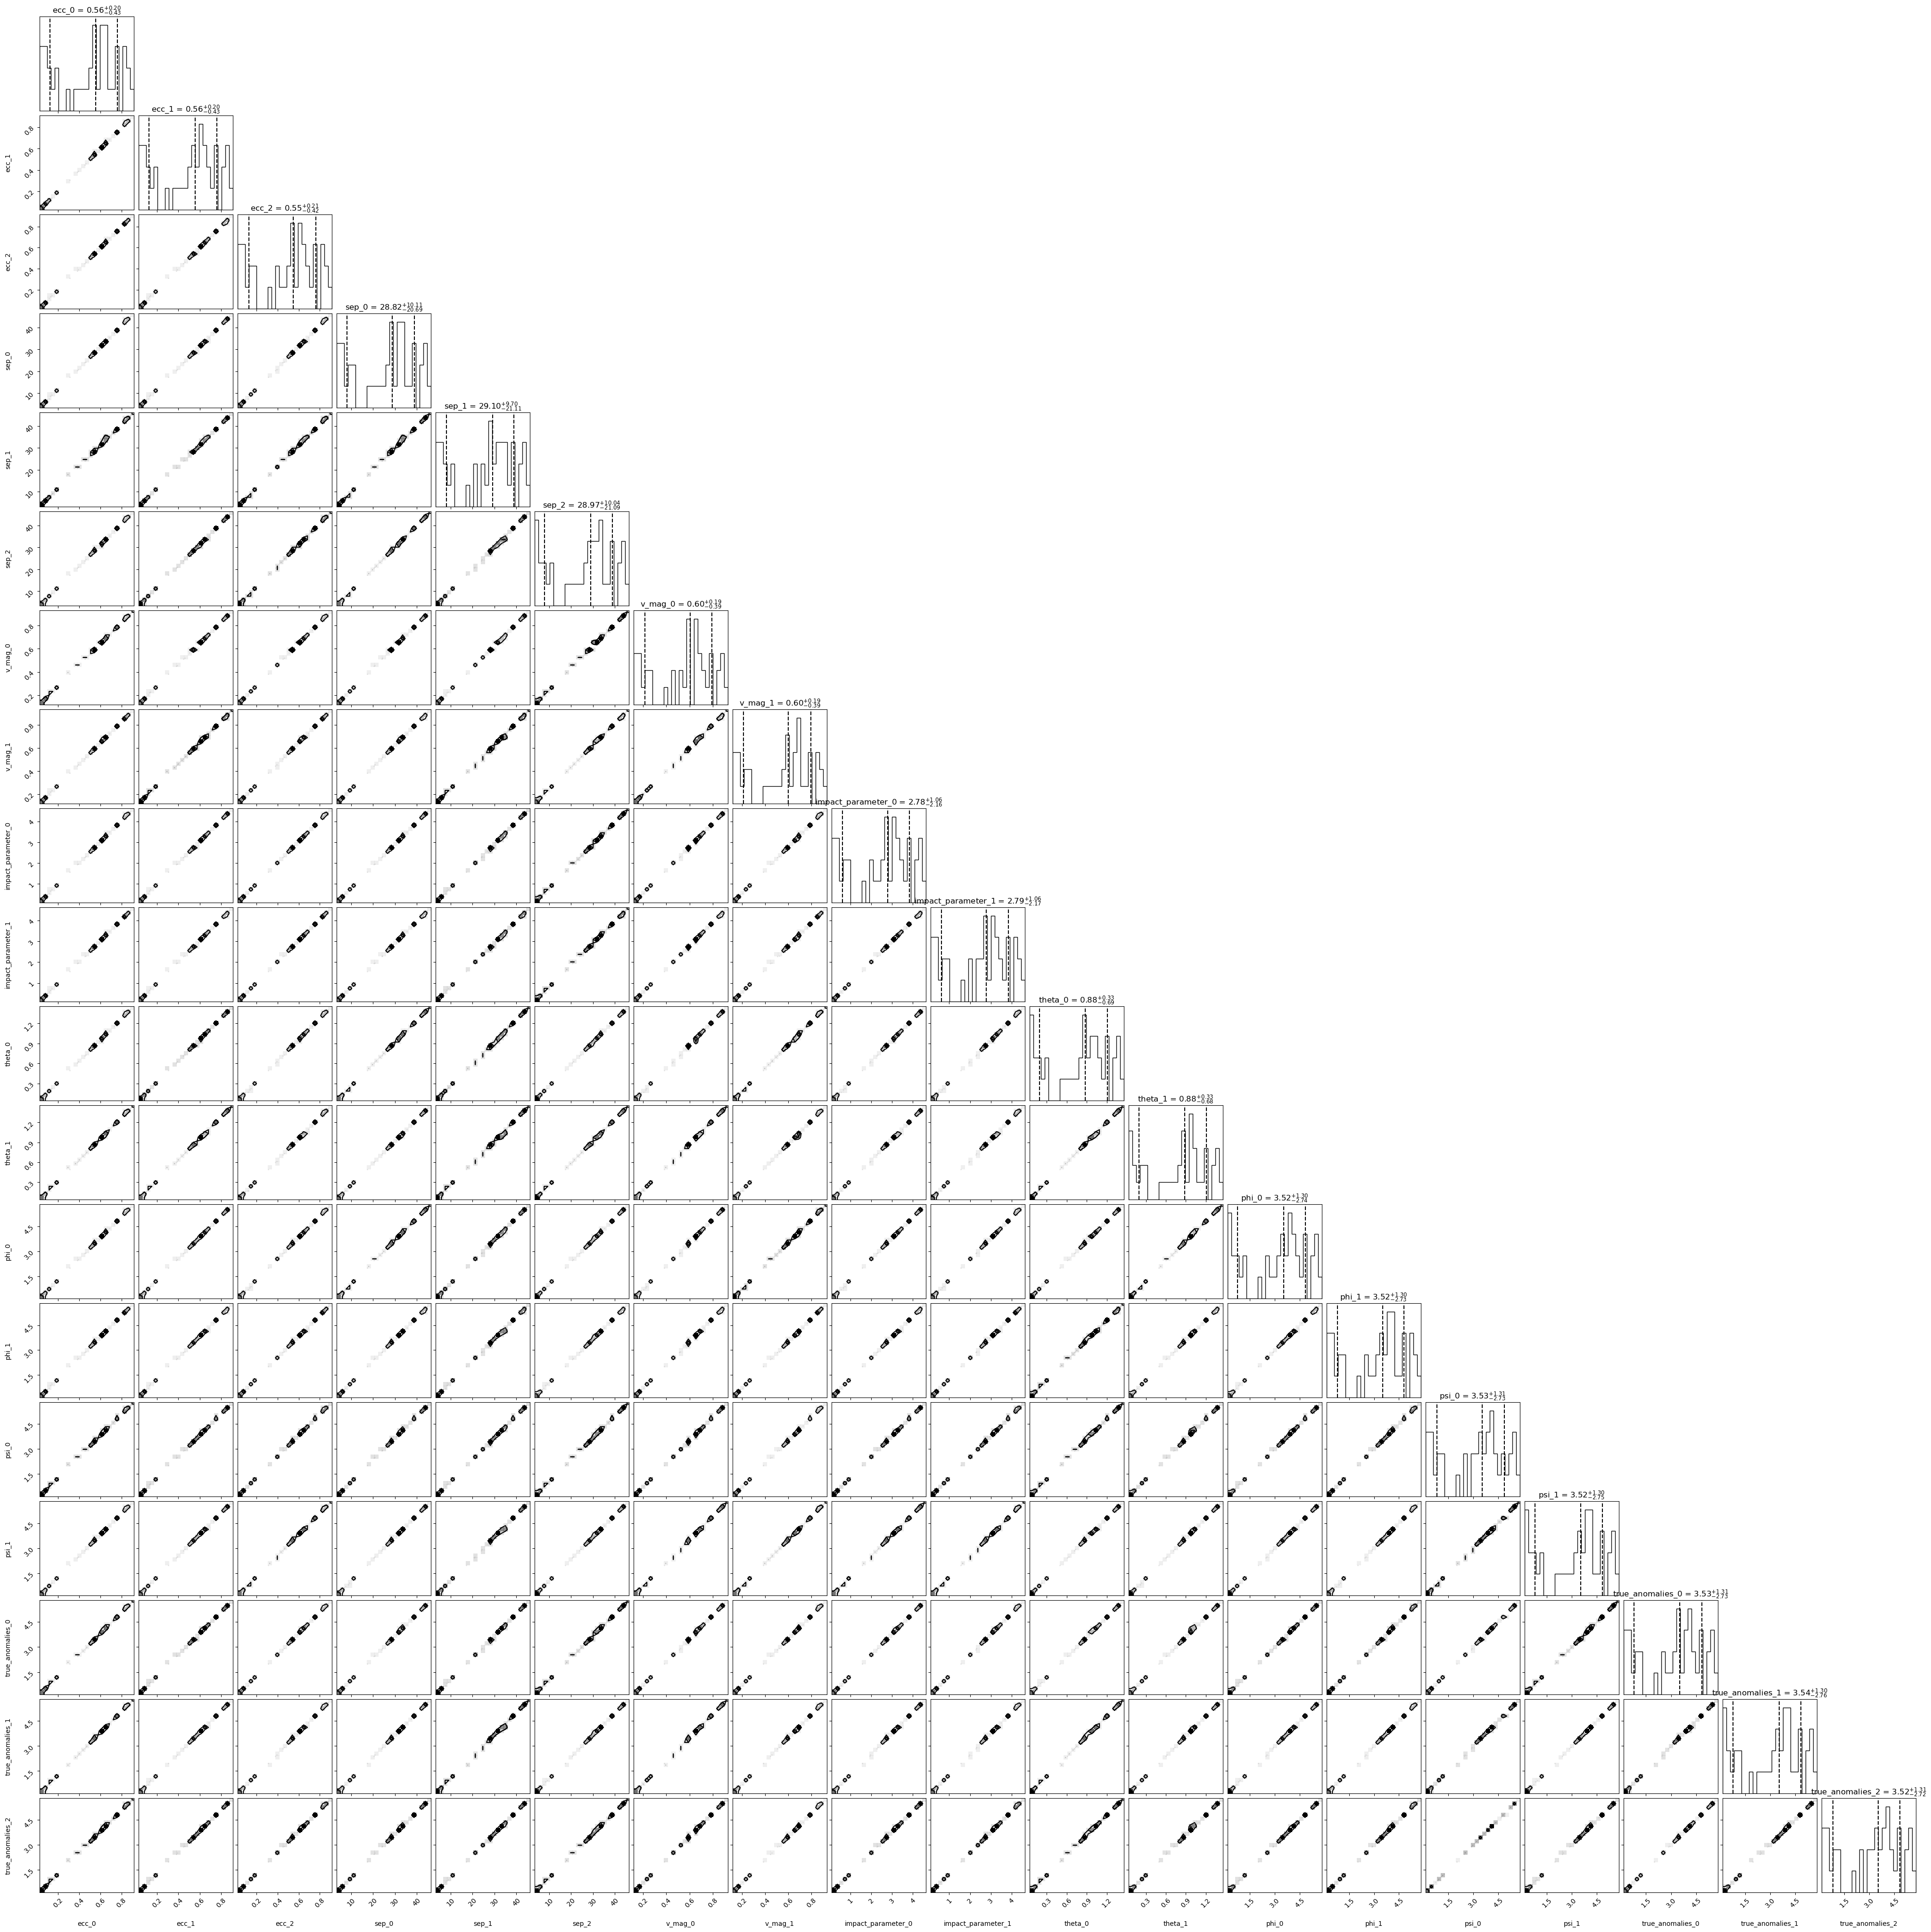

In [8]:
plot_corner_for_outcome(
    summary["samples"],
    summary["results"],
    outcome_name="creative_ionized"
)

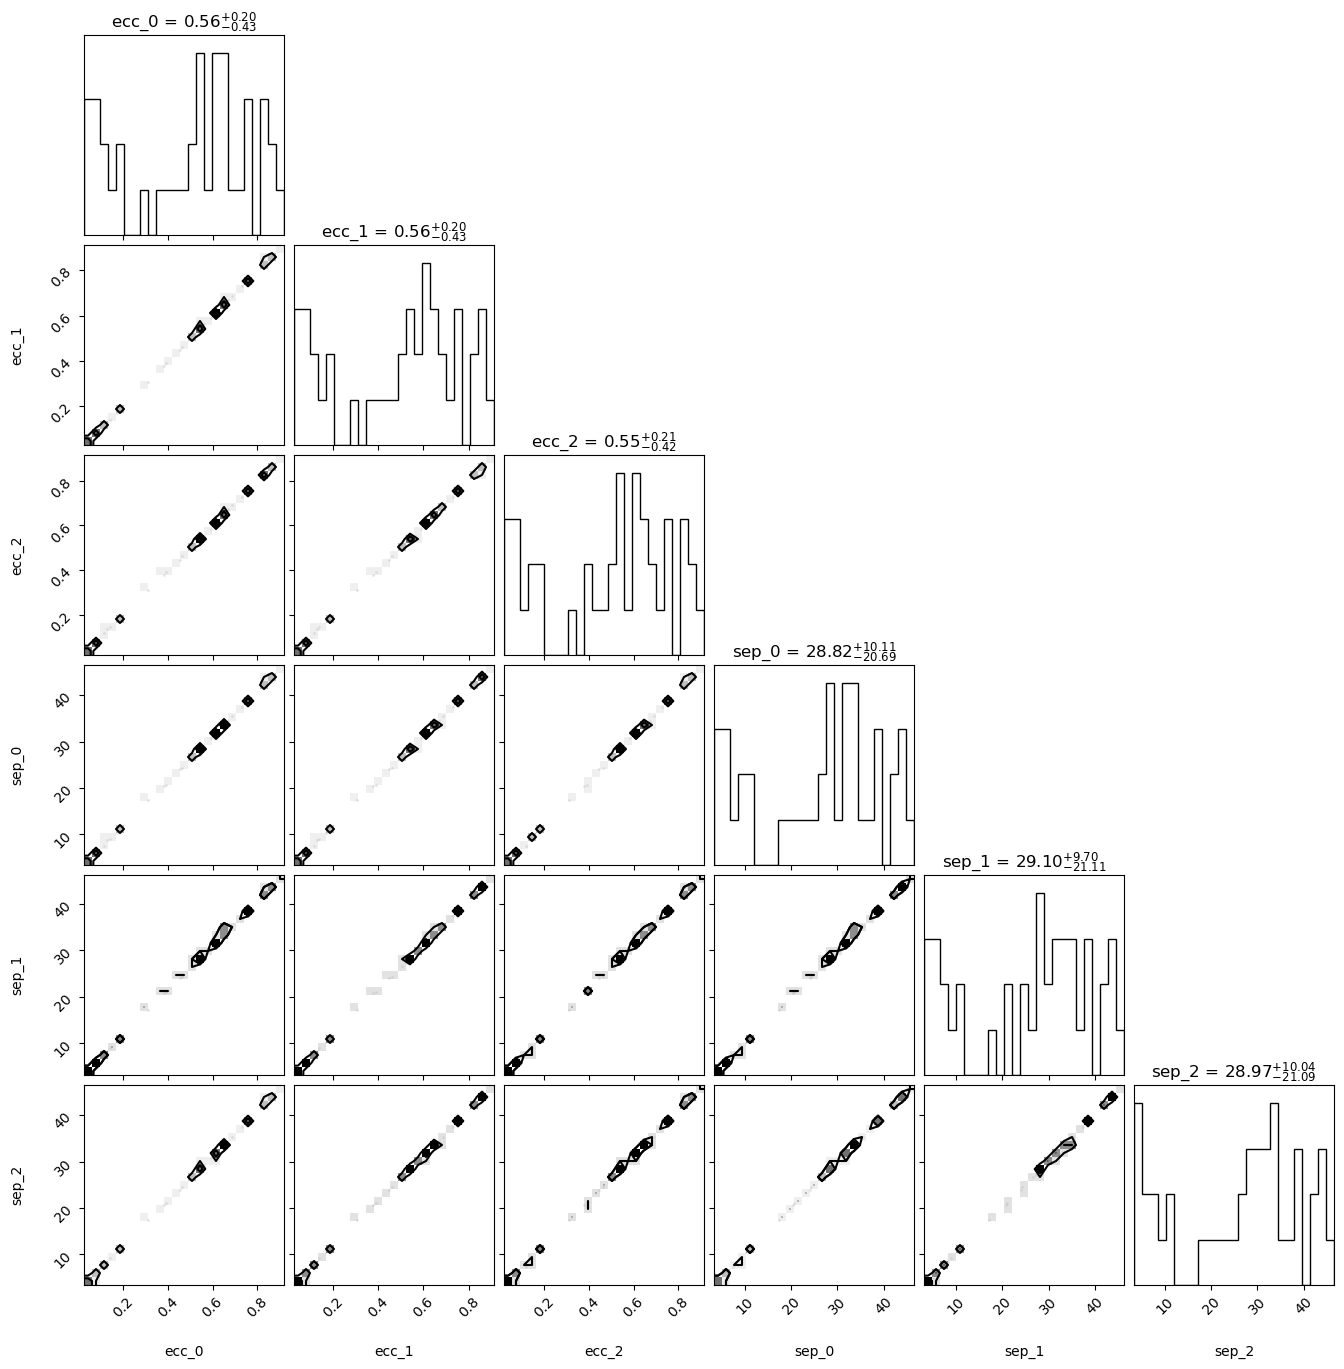

In [6]:

plot_corner_marginalized(
    samples=summary["samples"],
    results=summary["results"],
    outcome_name="creative_ionized",
    param_subset=["ecc", "sep"]
)



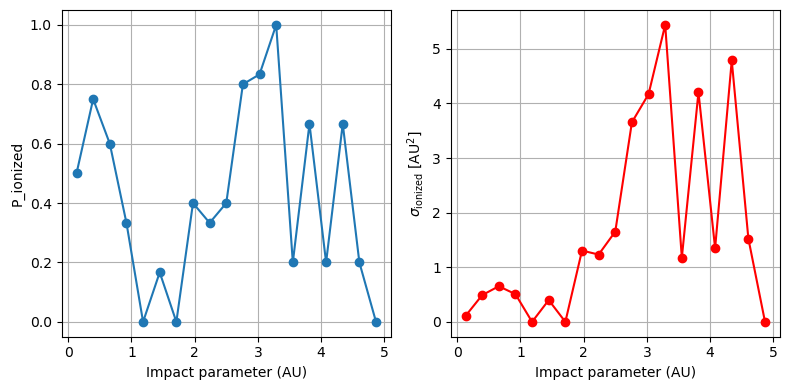

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Extract impact parameter (first incoming binary)
b = np.array([s["impact_parameter"][0] for s in summary["samples"]])
results = np.array([r[0] for r in summary["results"]])  # outcome_label strings

# Define bins
b_bins = np.linspace(0, 5, 20)
prob_binned = np.zeros(len(b_bins)-1)
sigma_binned = np.zeros(len(b_bins)-1)

for i in range(len(b_bins)-1):
    mask = (b >= b_bins[i]) & (b < b_bins[i+1])
    sims_in_bin = np.where(mask)[0]
    if len(sims_in_bin) == 0:
        prob_binned[i] = 0
        sigma_binned[i] = 0
        continue
    # Probability of ionized massive in this bin
    count_ionized = np.sum(results[sims_in_bin] == "creative_ionized")
    prob_binned[i] = count_ionized / len(sims_in_bin)
    # Differential cross-section in this bin
    sigma_binned[i] = np.pi * (b_bins[i+1]**2 - b_bins[i]**2) * prob_binned[i]

# Plot P_ionized
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot((b_bins[:-1]+b_bins[1:])/2, prob_binned, marker="o")
plt.xlabel("Impact parameter (AU)")
plt.ylabel("P_ionized")
plt.grid(True)

# Plot cross-section
plt.subplot(1,2,2)
plt.plot((b_bins[:-1]+b_bins[1:])/2, sigma_binned, marker="o", color="r")
plt.xlabel("Impact parameter (AU)")
plt.ylabel(r"$\sigma_\mathrm{ionized}$ [AU$^2$]")
plt.grid(True)

plt.tight_layout()
plt.show()
